In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("https://github.com/NelakurthiSudheer/Mall-Customers-Segmentation/raw/main/Dataset/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.size

1000

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

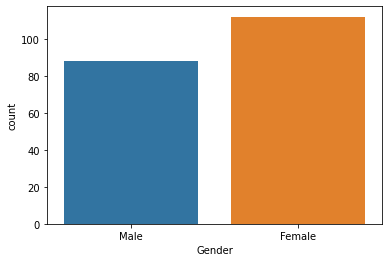

In [ ]:
sns.countplot(data=df, x="Gender")

In [ ]:
df.Age.max(),df.Age.min()

(70, 18)

In [ ]:
def grouping(x):
  if x>10 and x<=20:
    return "10-20"
  elif x>20 and x<=30:
    return "20-30"
  elif x>30 and x<=40:
    return "30-40"
  elif x>40 and x<=50:
    return "40-50"
  elif x>50 and x<=60:
    return "50-60"
  elif x>60 and x<=70:
    return "60-70"
  elif x>70 and x<=80:
    return "70-80"
    

In [ ]:
df["Age_group"] = df.Age.apply(lambda x: grouping(x))

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
0,Male,19,15,39,10-20
1,Male,21,15,81,20-30
2,Female,20,16,6,10-20
3,Female,23,16,77,20-30
4,Female,31,17,40,30-40


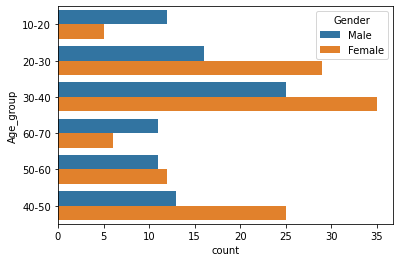

In [ ]:
sns.countplot(data=df, y="Age_group", hue='Gender')

### Bi-variate Clustering

K-means algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = df.iloc[:,-3:-1]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'Before_Clustering')

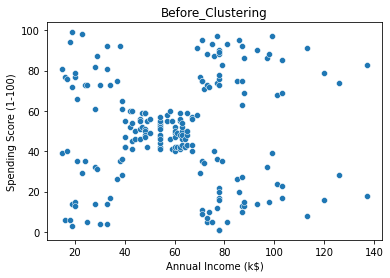

In [ ]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Before_Clustering")

In [ ]:
X = data.to_numpy()

In [ ]:
wcss=[]
for i in range(1,15):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

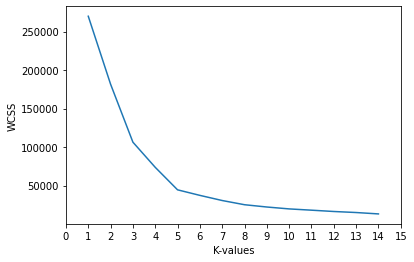

In [ ]:
### ELBOW CURVE
plt.plot(range(1,15),wcss)
plt.xticks(range(0,16))
plt.xlabel("K-values")
plt.ylabel("WCSS")
plt.show()

Unable to conclude the Optimal value of k using ELBOW CURVE

In [ ]:
silh=[]
for i in range(2,15):
  kmeans = KMeans(n_clusters=i, init= "k-means++")
  kmeans.fit(X)
  labels = kmeans.labels_
  silh.append(silhouette_score(X, labels, metric='euclidean'))

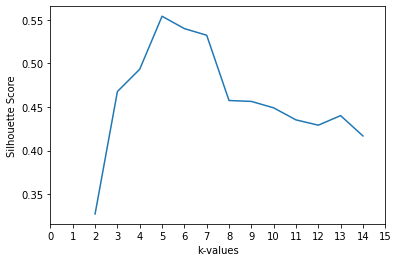

In [ ]:
### Silhouette Value - versus - k plot.

plt.plot(range(2,15),silh)
plt.xticks(range(0,16))
plt.xlabel("k-values")
plt.ylabel("Silhouette Score")
plt.show()

Global maxima at k=5


Optimal value of k is 5

In [ ]:
best_kmeans_model = KMeans(n_clusters=5, init= 'k-means++')

In [ ]:
best_kmeans_model.fit(X)

KMeans(n_clusters=5)

### PLOT OF THE CLUSTERS

In [ ]:
labels = best_kmeans_model.labels_

In [ ]:
centroids = best_kmeans_model.cluster_centers_

Text(0.5, 1.0, 'After_Clustering')

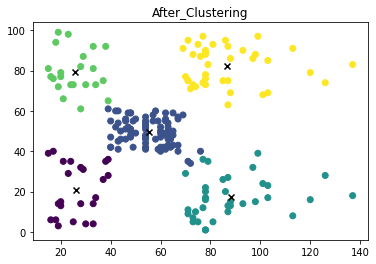

In [ ]:
plt.scatter(x=data['Annual Income (k$)'], y=data["Spending Score (1-100)"],c=labels)
plt.scatter(x=centroids[:,0], y=centroids[:,1], c= 'black', marker='x')
plt.title("After_Clustering")

In [ ]:
silhouette_score(X,labels)

0.553931997444648

Accuracy obtained by K-means method = 55%

### Hierarchial Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
hier_clus = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity= 'euclidean', linkage= 'ward')

In [ ]:
hier_clus = hier_clus.fit(X)

In [ ]:
labels=hier_clus.fit_predict(X)

Text(0.5, 1.0, 'After_Clustering')

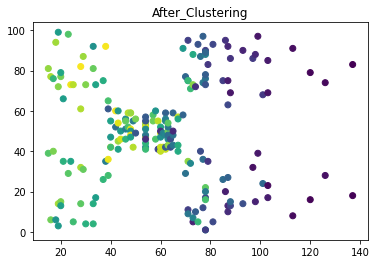

In [ ]:
plt.scatter(x=data["Annual Income (k$)"], y=data["Spending Score (1-100)"],c=labels)
plt.title("After_Clustering")

In [ ]:
def plot_dendrogram(model, **kwargs):
  ### Create linkage matrix and then plot the dendrogram

  ### Create the counts of samples under each node
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1 # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

  ### Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)


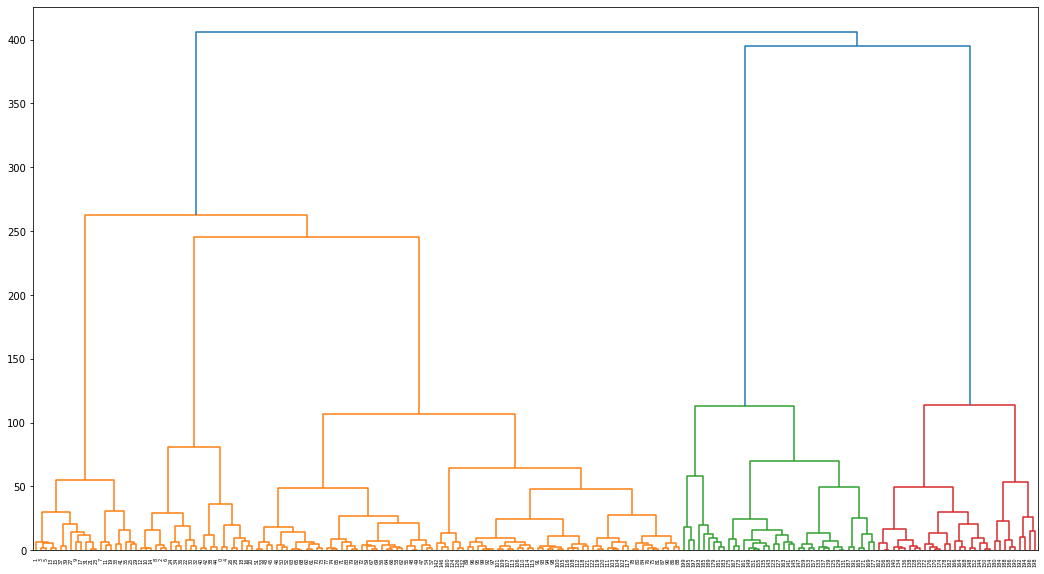

In [ ]:
plt.figure(figsize=(18,10))
plot_dendrogram(hier_clus, truncate_mode= "level")